In [4]:
import matplotlib.pyplot as plt
from spider import SPIDER
op = SPIDER()
import anndata
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np

# use cpus only
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
TF_ENABLE_ONEDNN_OPTS = 0

In [5]:
ds = 'mouse_lung'
sample_name = 'D2'
out_f = f'../input_datasets/{ds}/{sample_name}/'
adata = anndata.read_h5ad(f'{out_f}/adata.h5ad')
out_f = f'../datasets/{ds}/{sample_name}/'


running results

In [6]:
# R_path = 'your R path'
# no_spatalk = False
# if len(adata) > 10000:
#     no_spatalk=True
# idata = op.prep(adata, out_f, R_path, cluster_key=adata.uns['cluster_key'], is_human=adata.uns['is_human'], coord_type=adata.uns['coord_type'], no_spatalk=no_spatalk)
# idata, meta_idata = op.find_svi(idata, out_f, R_path, alpha=0.3)
# idata.write_h5ad(f'{out_f}/idata.h5ad')

reading results

In [7]:
idata = anndata.read_h5ad(f'{out_f}/idata.h5ad')

metrics

Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC' 'moranI']
298/1919 SVIs identified (threshold=0.01).
evaluating with ['moranI' 'gearyC' 'SOMDE' 'nnSVG']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR
(SOMDE)_SVI vs. LR
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:6.622e-97 U_stat=4.249e+05
FSV
(SOMDE)_SVI vs. FSV
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:5.438e-41 U_stat=3.590e+05
LR
(nnSVG)_SVI vs. LR
(nnSVG)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:6.712e-157 U_stat=4.612e+05


Moran
I_SVI vs. Moran
I_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:5.358e-97 U_stat=4.250e+05
Geary
C (rev.)_SVI vs. Geary
C (rev.)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:4.274e-97 U_stat=4.251e+05


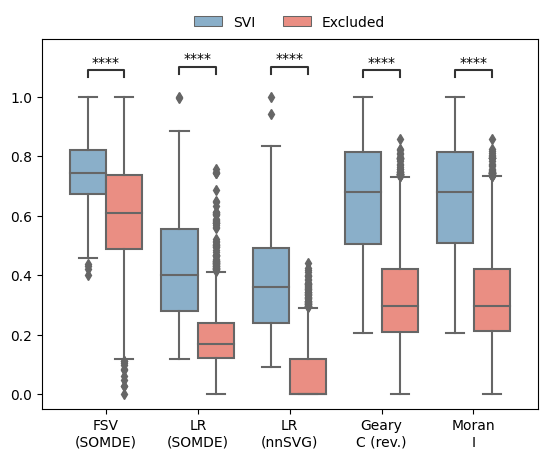

In [8]:
svi_df, svi_df_strict = op.svi.combine_SVI(idata,threshold=0.01)
op.svi.eva_SVI(idata, svi_df_strict)
plt.savefig(f'../figures/{ds}_{sample_name}_metric.png', dpi=100,bbox_inches='tight')

100%|██████████| 1000/1000 [1:23:55<00:00,  5.04s/]


Mouse KEGG_2019_Mouse
Using mouse LR pair dataset.
50
0.5915948271246574 0.3271065397923146 0.09730185291810531


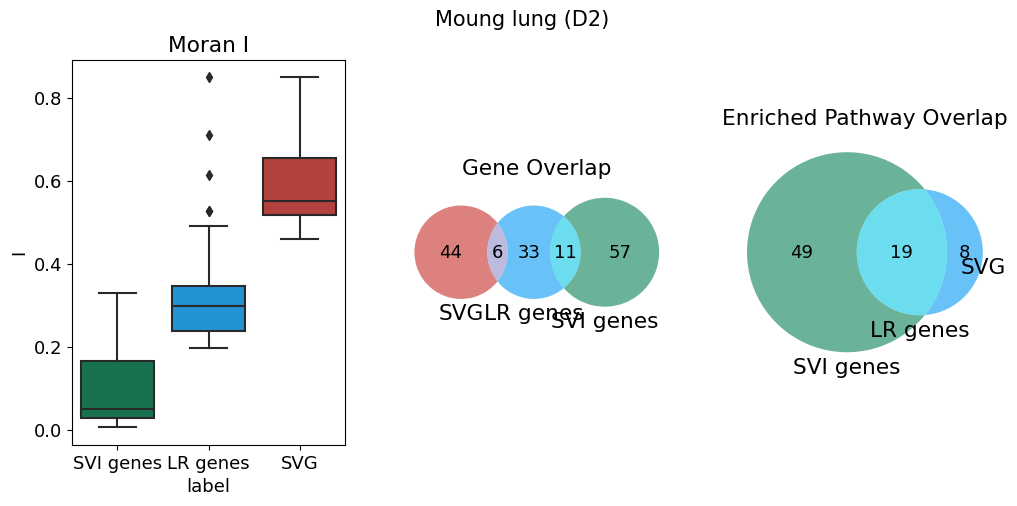

In [9]:
sq.gr.spatial_neighbors(adata, key_added='spatial')
sq.gr.spatial_autocorr(
    adata,
    genes=adata.var_names,
    mode="moran",
    n_perms=1000,
    n_jobs=10,
)


plt.rcParams['font.size'] = 13
merged_df,lri_pw_list,gene_lr_list,gene_pw_list = op.vis.svg_svi_relation(adata, idata, title='Moung lung (D2)', is_human=adata.uns['is_human'], top=50)
plt.show()

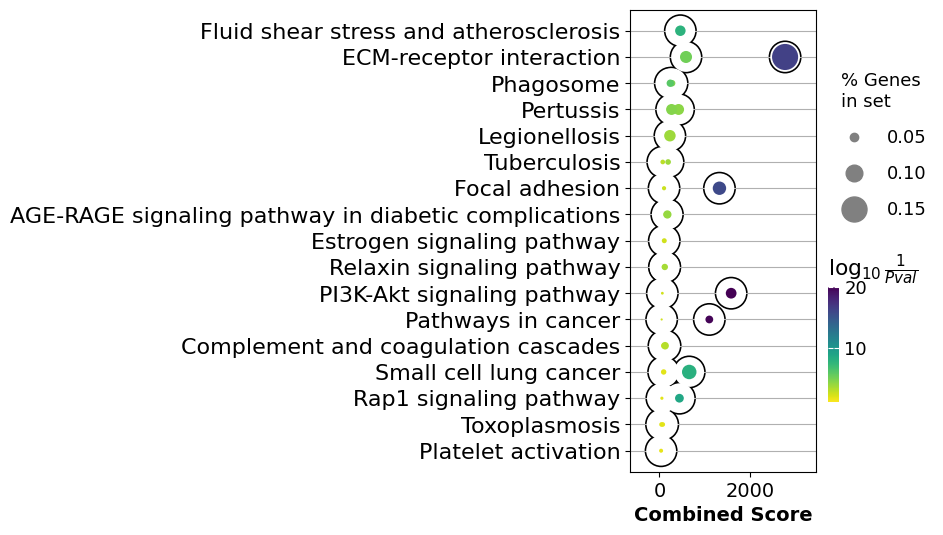

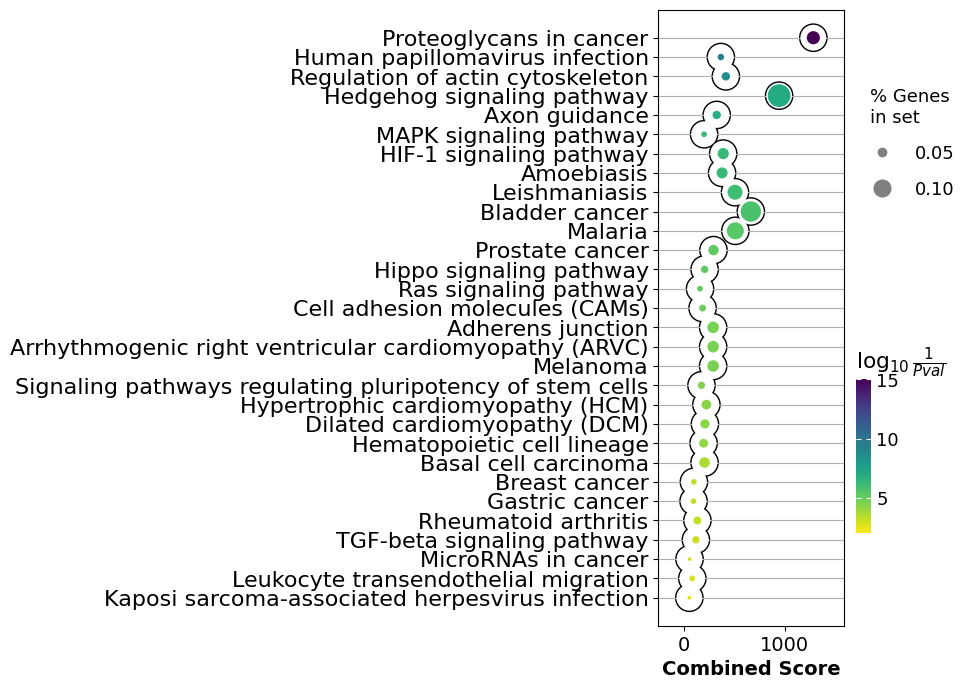

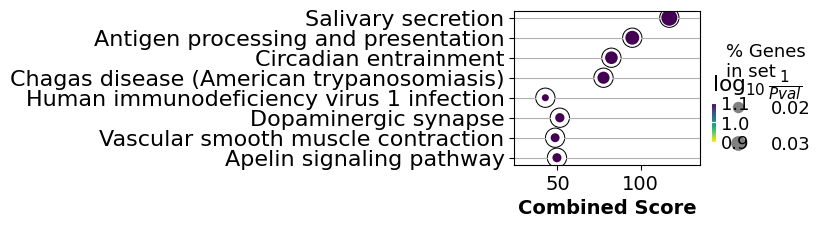

In [10]:
import gseapy
membership=pd.get_dummies(merged_df.set_index('Term')['group']).groupby('Term').sum().astype(str).agg('-'.join, axis=1).reset_index()
for x in membership[0].unique():
    sub_df = merged_df[merged_df.Term.isin(membership[membership[0]==x].Term)]
    if len(sub_df.Term.unique())>20:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=20, figsize=(3,8),top_term=30,show_ring=True)
    elif len(sub_df.Term.unique())>10:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=20, figsize=(3,6),top_term=30,show_ring=True)
    elif len(sub_df.Term.unique())<5:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=100, figsize=(3,1),top_term=30,show_ring=True)
    else:
        ax = gseapy.dotplot(sub_df, title='',cmap='viridis_r', size=50, figsize=(3,2),top_term=30,show_ring=True)

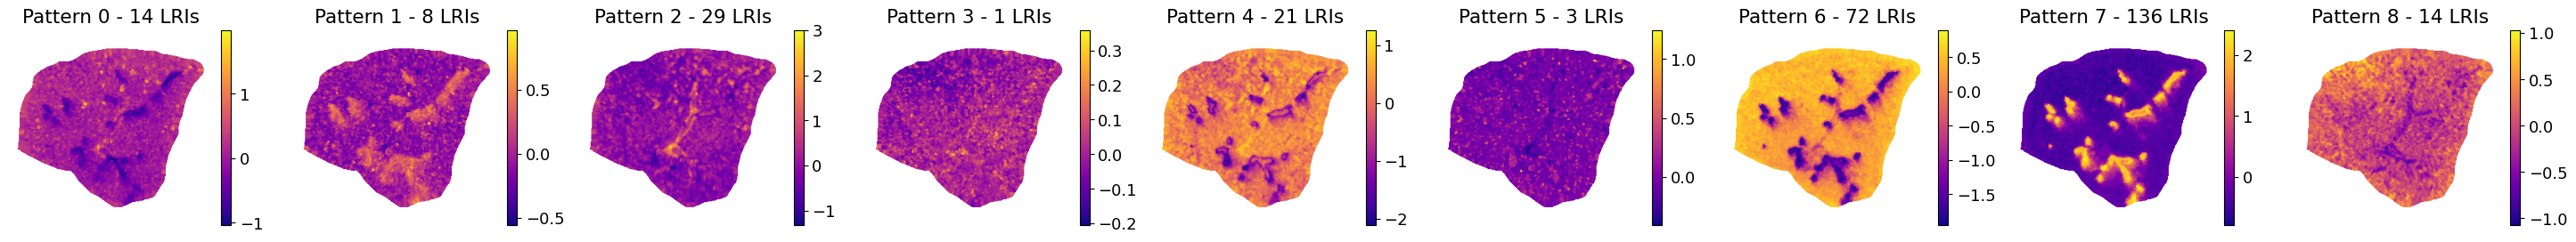

In [11]:
op.vis.pattern_LRI(idata,spot_size=1)
plt.tight_layout()
plt.savefig(f'../figures/{ds}_{sample_name}_patterns.png', dpi=100,bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

8_non-member vs. 8_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:7.193e-24 U_stat=3.070e+02
1_non-member vs. 1_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.796e-12 U_stat=7.900e+02
0_non-member vs. 0_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:2.261e-22 U_stat=7.590e+02
2_non-member vs. 2_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.212e-47 U_stat=4.290e+02
3_non-member vs. 3_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:3.024e-03 U_stat=0.000e+00
4_non-member vs. 4_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:1.453e-35 U_stat=2.050e+02
5_non-member vs. 5_member: Mann-W

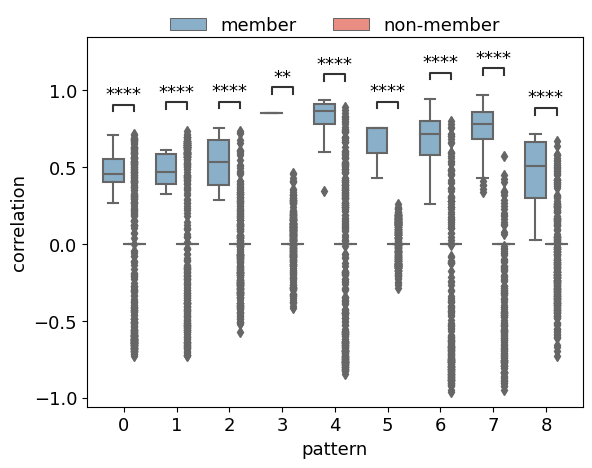

In [12]:
op.svi.eva_pattern(idata)


In [13]:
idata = idata[:, idata.var['is_svi']==1]

In [14]:
adata, adata_lri, adata_pattern = op.cell_transform(idata, adata, label=adata.uns['cluster_key'])

Added key cell_pattern in idata.uns
Added key cell_score in idata.uns
Added key interaction_pattern, interaction_score in adata.obsm
Added key rank_interaction_score_groups, rank_interaction_pattern_groups in adata.uns


         Falling back to preprocessing with `sc.pp.pca` and default params.


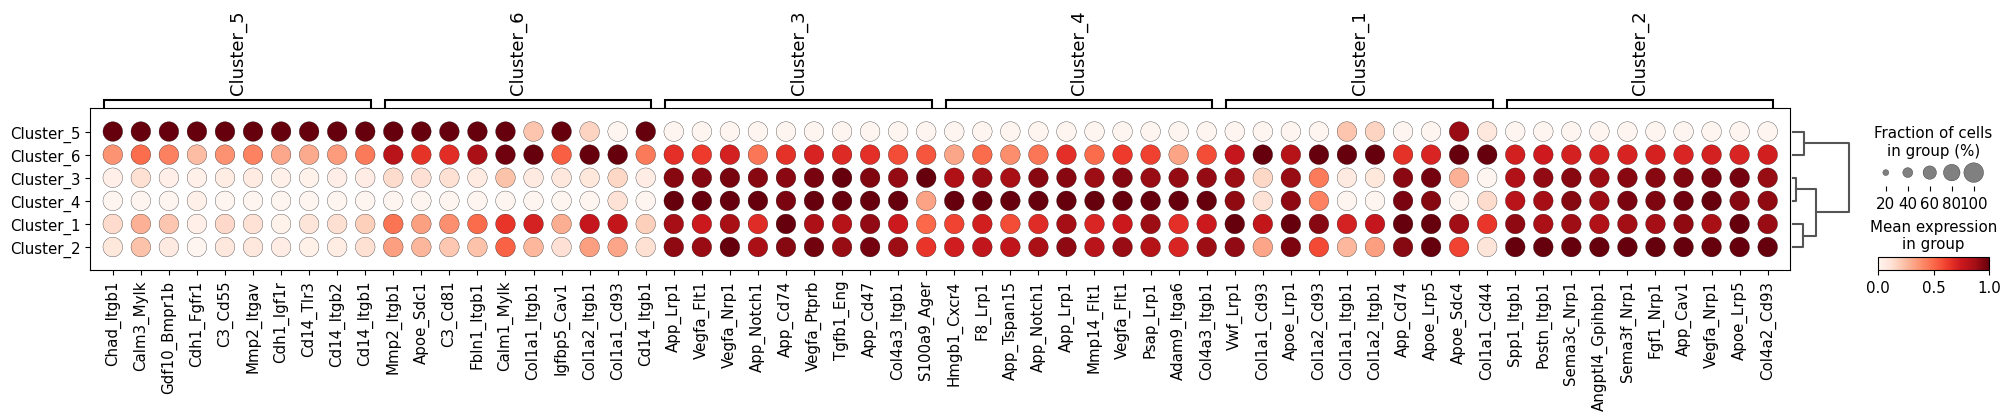

In [15]:
with plt.rc_context():
    sc.pl.rank_genes_groups_dotplot(adata_lri, standard_scale='var', show=False)
    plt.savefig(f'../figures/{ds}_{sample_name}_label_SVI.png', bbox_inches="tight")

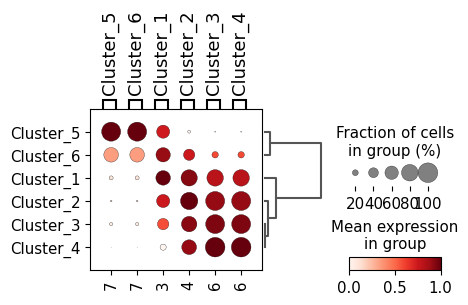

In [16]:
with plt.rc_context(): 
    sc.pl.rank_genes_groups_dotplot(adata_pattern, standard_scale='var', n_genes=1, show=False)
    plt.savefig(f'../figures/{ds}_{sample_name}_label_pattern.png', bbox_inches="tight")


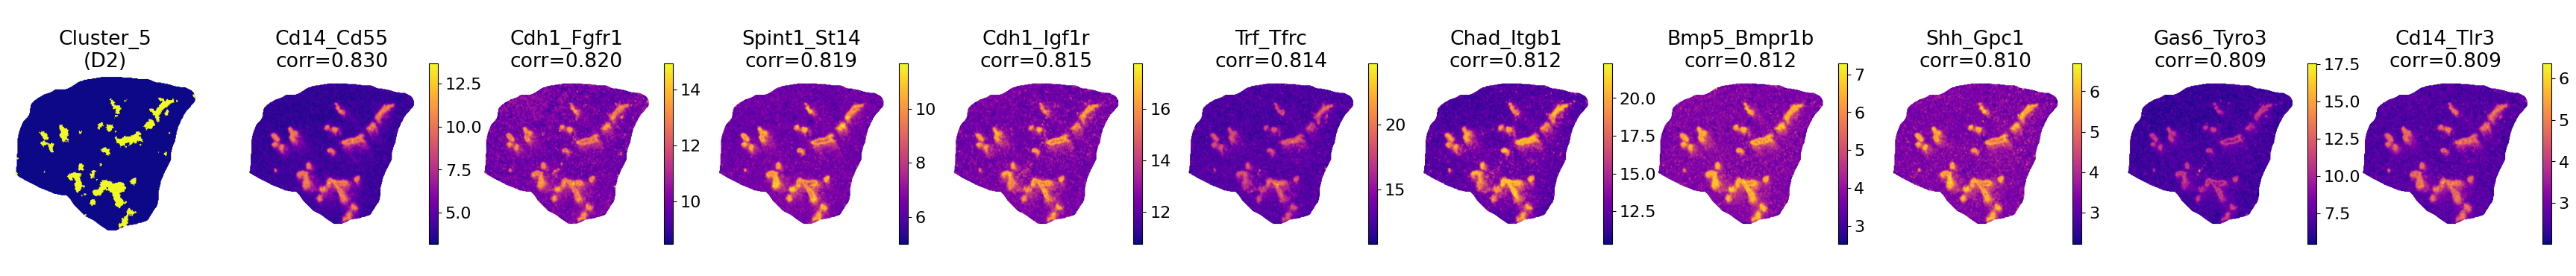

In [17]:
from scipy import stats
pds = []
for i in adata_lri.var_names:
    pds.append(pd.get_dummies(adata.obs['annotation']).corrwith(adata_lri.to_df()[i].astype('float'), method=stats.pointbiserialr)[:1])
pds_df = pd.concat(pds)
pds_df.index = adata_lri.var_names
adata.obs[['row', 'col']] = adata.obs[['row', 'col']].astype(int)
adata_lri.obs[['row', 'col']] = adata_lri.obs[['row', 'col']].astype(int)
useful_df = []
plt.rcParams.update({'font.size': 16})
for cluster_i in adata.obs['annotation'].unique():
    if cluster_i != 'Cluster_5':
        continue
    df_sub = pds_df[pds_df[cluster_i]>0.5][cluster_i].sort_values(ascending=False)
    if len(df_sub) > 0:
        useful_df.append(df_sub)
        markers = df_sub.index.to_numpy()[:10]
        corrs = df_sub.values[:10]
        cluster_name = df_sub.name
        plt.figure(figsize=(4*(len(markers)+1), 4))
        base = 1
        plt.subplot(1, len(markers)+1, base)

        plt.scatter(adata.obs['row'],adata.obs['col'], c=adata.obs['annotation']==cluster_i, s=0.5, cmap='plasma')
        plt.axis('equal')
        plt.axis('off')
        plt.title(f'\n{cluster_name}\n({sample_name})',y=0.85)
        base += 1

        marker_score = adata_lri.to_df()[markers]
        marker_score = pd.concat([adata_lri.obs[['row', 'col']], marker_score], axis=1)
        for i in range(len(markers)):
            plt.subplot(1, len(markers)+1, base)
            im=plt.scatter(marker_score['row'],marker_score['col'], c=marker_score[markers[i]], s=0.5, cmap='plasma')
            plt.colorbar(im,fraction=0.046, pad=0.04)
            plt.axis('equal')
            plt.axis('off')
            plt.title(f'\n{markers[i]}\ncorr={"%.3f" % corrs[i]}',y=0.85)
            base += 1
        plt.savefig(f'../figures/{ds}_{sample_name}_{cluster_name}.png', dpi=300,bbox_inches='tight')

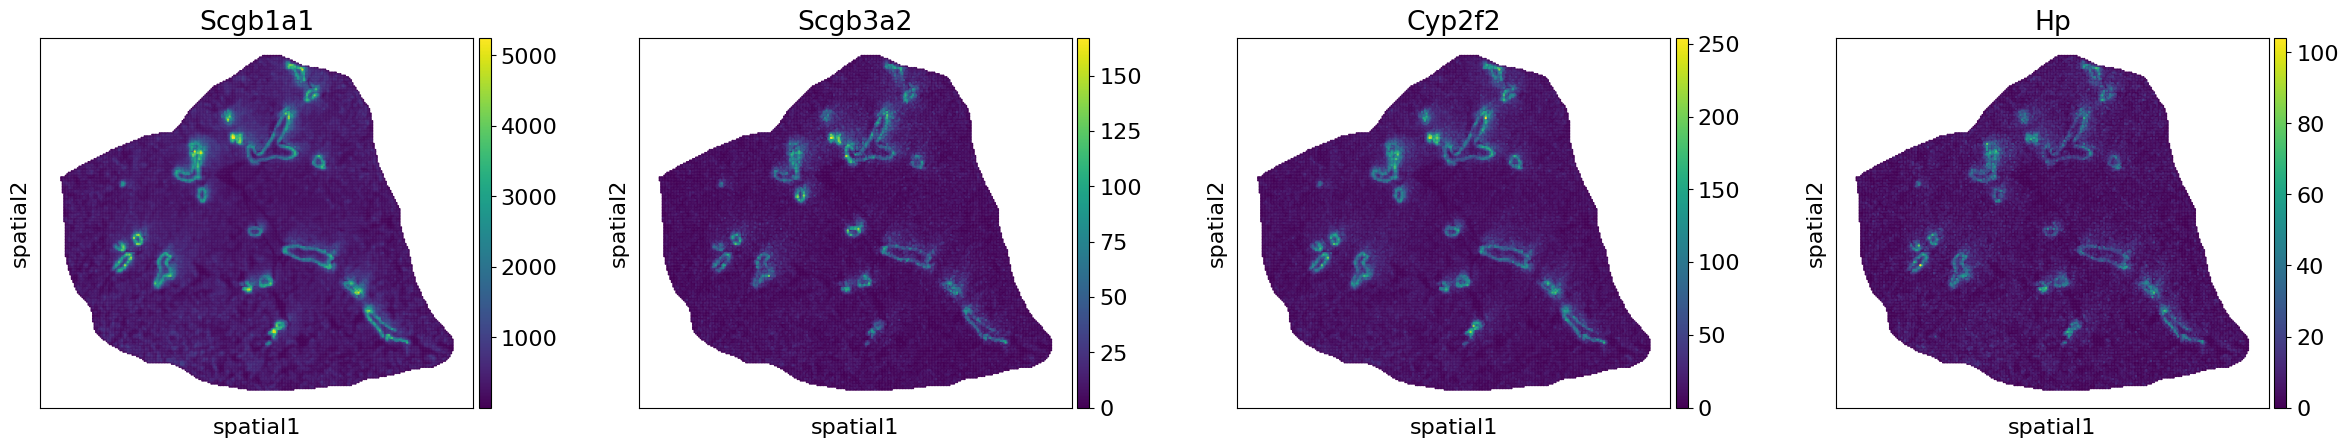

In [20]:
adata.obsm['spatial'] = adata.obsm['spatial'].astype(int)
sc.pl.spatial(adata, color=['Scgb1a1', 'Scgb3a2', 'Cyp2f2', 'Hp'], spot_size=1.5)

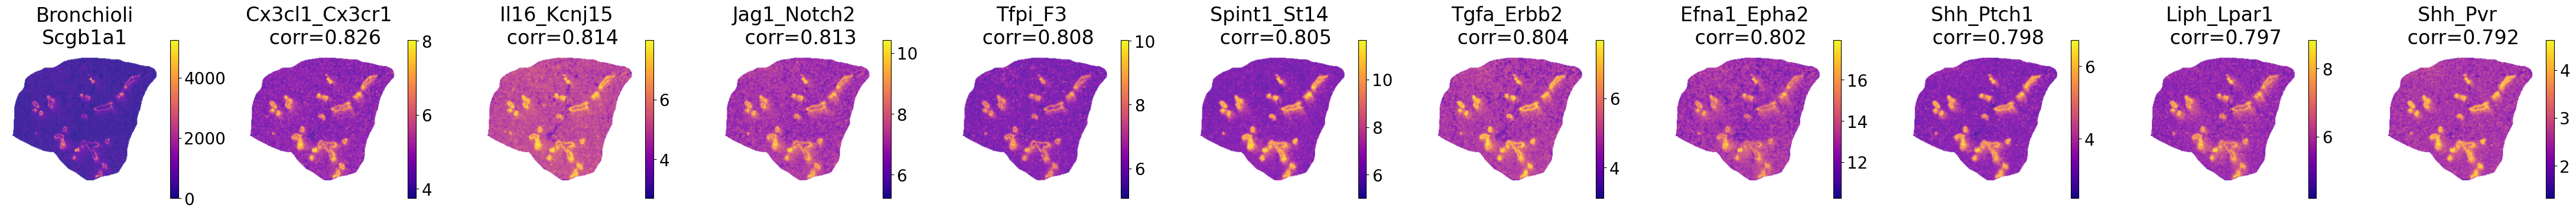

In [21]:
corr_df = pd.concat([adata.to_df()[['Scgb1a1', 'Scgb3a2', 'Cyp2f2', 'Hp']].loc[adata_lri.obs_names], adata_lri.to_df()], axis=1).corr(method='pearson')
corr_df_asyn =  corr_df.loc[adata_lri.var_names, ['Scgb1a1', 'Scgb3a2', 'Cyp2f2', 'Hp']]
plt.rcParams.update({'font.size': 20})

corrs = corr_df_asyn.mean(1).sort_values(ascending=False).values[:10]
lris = corr_df_asyn.mean(1).sort_values(ascending=False).index[:10]
marker_score = adata_lri.to_df()[lris]
adata.obs[['row', 'col']] = adata.obs[['row', 'col']].astype(int)
adata_lri.obs[['row', 'col']] = adata_lri.obs[['row', 'col']].astype(int)

plt.figure(figsize=(44, 4))
base=1
plt.subplot(1, 11, base)
im=plt.scatter(adata.obs['row'],adata.obs['col'], c=adata.to_df()['Scgb1a1'], s=0.05, cmap='plasma',vmin=0)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('equal')
plt.axis('off')
plt.title('Bronchioli\nScgb1a1', y=0.9)
base+=1
for i in range(len(lris)):
    plt.subplot(1, 11, base)
    im=plt.scatter(adata_lri.obs['row'],adata_lri.obs['col'], c=marker_score[lris[i]], s=0.05, cmap='plasma')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'{lris[i]} \n corr={"%.3f" % corrs[i]}', y=0.9)
    base += 1
plt.tight_layout()
plt.savefig(f'../figures/{ds}_{sample_name}_BronchioliMarker.png', dpi=600,bbox_inches='tight')

In [22]:
out_f = f'../input_datasets/{ds}/{sample_name}/'
decon = pd.read_csv(f'{out_f}/decon.csv', index_col=0)
corr_df = pd.concat([decon.T, adata_lri.to_df().loc[decon.columns]], axis=1).corr(method='pearson')
corr_df_asyn =  corr_df.loc[adata_lri.var_names, decon.index]
mask = corr_df_asyn.loc[corr_df_asyn.idxmax()].to_numpy().diagonal() > 0.3
decon_meta = pd.concat([decon.T, adata_lri.obs.loc[decon.columns]], axis=1)
decon_meta[['row', 'col']] = decon_meta[['row', 'col']].astype(int)

In [23]:
corr_df_asyn.loc[corr_df_asyn.idxmax()[mask], corr_df_asyn.idxmax()[mask].index]

Adventitial Fibroblast  Alveolar Fibroblast  Capillary  Ciliated
Col1a1_Itgb1                0.360615            -0.197127  -0.192745  0.113397
Fn1_Itga3                  -0.169684             0.354063   0.282419 -0.473017
Efnb1_Ephb4                -0.164026             0.317547   0.319159 -0.510579
C3_Cd55                     0.073667            -0.267777  -0.262232  0.719774

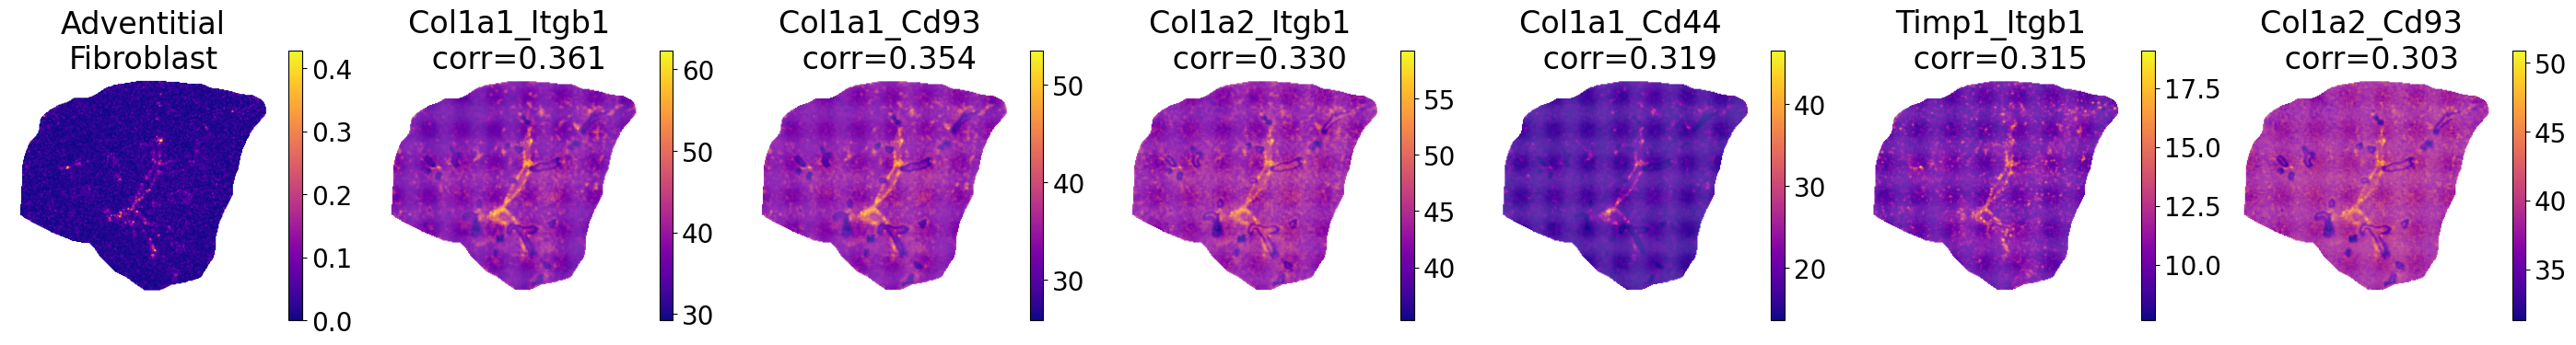

In [24]:
plt.rcParams.update({'font.size': 20})

corrs = corr_df_asyn[corr_df_asyn['Adventitial Fibroblast']>0.3]['Adventitial Fibroblast'].sort_values(ascending=False).values[:10]
lris = corr_df_asyn[corr_df_asyn['Adventitial Fibroblast']>0.3]['Adventitial Fibroblast'].sort_values(ascending=False).index[:10]
marker_score = adata_lri.to_df().loc[decon.columns, lris]

plt.figure(figsize=(44, 4))
base=1
plt.subplot(1, 11, base)
cell_meta_sub=decon_meta[decon_meta['Adventitial Fibroblast']>0].sort_values('Adventitial Fibroblast')
im=plt.scatter(decon_meta['row'],decon_meta['col'], c=decon_meta['Adventitial Fibroblast'], s=1, cmap='plasma',vmin=0, edgecolors='none')
plt.scatter(cell_meta_sub['row'],cell_meta_sub['col'], c=cell_meta_sub['Adventitial Fibroblast'], s=3, cmap='plasma',vmin=0, edgecolors='none')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('equal')
plt.axis('off')
plt.title(f'Adventitial\nFibroblast', y=0.9)
base+=1
for i in range(len(lris)):
    plt.subplot(1, 11, base)
    im=plt.scatter(decon_meta['row'],decon_meta['col'], c=marker_score[lris[i]], s=1, cmap='plasma', edgecolors='none')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'{lris[i]} \n corr={"%.3f" % corrs[i]}', y=0.9)
    base += 1
plt.tight_layout()
plt.savefig(f'../figures/{ds}_{sample_name}_AdventitialFibroblast.png', dpi=600,bbox_inches='tight')

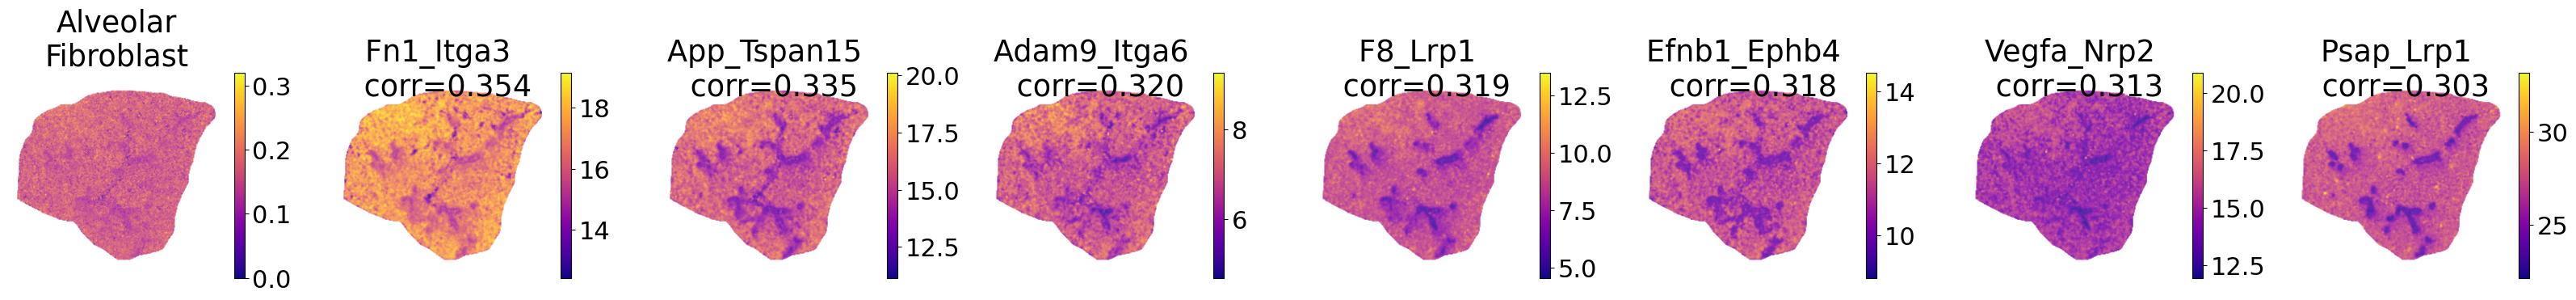

In [25]:
plt.rcParams.update({'font.size': 22})

corrs = corr_df_asyn[corr_df_asyn['Alveolar Fibroblast']>0.3]['Alveolar Fibroblast'].sort_values(ascending=False).values[:10]
lris = corr_df_asyn[corr_df_asyn['Alveolar Fibroblast']>0.3]['Alveolar Fibroblast'].sort_values(ascending=False).index[:10]
marker_score = adata_lri.to_df().loc[decon.columns, lris]

plt.figure(figsize=(44, 4))
base=1
plt.subplot(1, 11, base)
im=plt.scatter(decon_meta['row'],decon_meta['col'], c=decon_meta['Alveolar Fibroblast'], s=0.05, cmap='plasma',vmin=0)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('equal')
plt.axis('off')
plt.title(f'Alveolar\nFibroblast')
base+=1
for i in range(len(lris)):
    plt.subplot(1, 11, base)
    im=plt.scatter(decon_meta['row'],decon_meta['col'], c=marker_score[lris[i]], s=0.05, cmap='plasma')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'{lris[i]} \n corr={"%.3f" % corrs[i]}', y=0.85)
    base += 1
plt.tight_layout()
plt.savefig(f'../figures/{ds}_{sample_name}_AlveolarFibroblast.png', dpi=600,bbox_inches='tight')

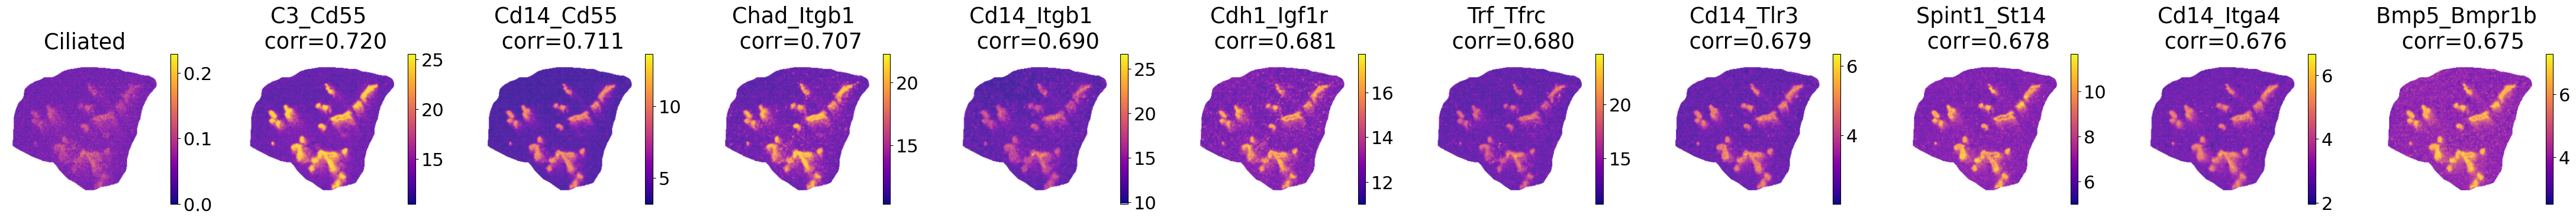

In [26]:
plt.rcParams.update({'font.size': 22})

corrs = corr_df_asyn[corr_df_asyn['Ciliated']>0.3]['Ciliated'].sort_values(ascending=False).values[:10]
lris = corr_df_asyn[corr_df_asyn['Ciliated']>0.3]['Ciliated'].sort_values(ascending=False).index[:10]
marker_score = adata_lri.to_df().loc[decon.columns, lris]

plt.figure(figsize=(44, 4))
base=1
plt.subplot(1, 11, base)
im=plt.scatter(decon_meta['row'],decon_meta['col'], c=decon_meta['Ciliated'], s=0.05, cmap='plasma',vmin=0)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('equal')
plt.axis('off')
plt.title(f'Ciliated')
base+=1
for i in range(len(lris)):
    plt.subplot(1, 11, base)
    im=plt.scatter(decon_meta['row'],decon_meta['col'], c=marker_score[lris[i]], s=0.05, cmap='plasma')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'{lris[i]} \n corr={"%.3f" % corrs[i]}')
    base += 1
plt.tight_layout()
plt.savefig(f'../figures/{ds}_{sample_name}_Ciliated.png', dpi=600,bbox_inches='tight')

In [27]:
arr = []
for cluster_i in corr_df_asyn.columns:
    df_sub = corr_df_asyn[corr_df_asyn[cluster_i]>0.3][cluster_i].sort_values(ascending=False)
    for j in df_sub.index:
        arr.append([cluster_i, j])
celltype_lris = pd.DataFrame(arr, columns=['celltype', 'lri']).set_index('lri')
merged_df, arr = op.er.enrichment_interacrtion_gene_df(celltype_lris, groupby='celltype',  is_human=False)
merged_df[merged_df['celltype']=='Adventitial Fibroblast']

Gene_set                                               Term  \
0   KEGG_2019_Mouse                           ECM-receptor interaction   
1   KEGG_2019_Mouse                            Proteoglycans in cancer   
2   KEGG_2019_Mouse                                Platelet activation   
3   KEGG_2019_Mouse                                     Focal adhesion   
4   KEGG_2019_Mouse                         PI3K-Akt signaling pathway   
5   KEGG_2019_Mouse                     Human papillomavirus infection   
6   KEGG_2019_Mouse                   Protein digestion and absorption   
7   KEGG_2019_Mouse  AGE-RAGE signaling pathway in diabetic complic...   
8   KEGG_2019_Mouse                                         Amoebiasis   
9   KEGG_2019_Mouse                          Relaxin signaling pathway   
10  KEGG_2019_Mouse                                      Leishmaniasis   
11  KEGG_2019_Mouse  Arrhythmogenic right ventricular cardiomyopath...   
12  KEGG_2019_Mouse             Bacterial invasion of epithelial cells   
13  KEGG_2019_Mouse                                          Pertussis   
14  KEGG_2019_Mouse                  Hypertrophic cardiomyopathy (HCM)   
15  KEGG_2019_Mouse                       Dilated cardiomyopathy (DCM)   
16  KEGG_2019_Mouse                             Small cell lung cancer   
17  KEGG_2019_Mouse                         Hematopoietic cell lineage   
18  KEGG_2019_Mouse                            HIF-1 signaling pathway   
19  KEGG_2019_Mouse                                      Toxoplasmosis   
20  KEGG_2019_Mouse               Leukocyte transendothelial migration   
21  KEGG_2019_Mouse                                     Tight junction   
22  KEGG_2019_Mouse                     Cell adhesion molecules (CAMs)   
23  KEGG_2019_Mouse                                          Phagosome   
24  KEGG_2019_Mouse                                      Axon guidance   
25  KEGG_2019_Mouse                             Rap1 signaling pathway   
26  KEGG_2019_Mouse                   Regulation of actin cytoskeleton   
27  KEGG_2019_Mouse                       Epstein-Barr virus infection   
28  KEGG_2019_Mouse                                MicroRNAs in cancer   
29  KEGG_2019_Mouse                                 Pathways in cancer   

   Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0     4/83  4.109052e-09      1.232716e-07            0                     0   
1    4/203  1.521184e-07      2.281776e-06            0                     0   
2    3/125  4.701506e-06      4.701506e-05            0                     0   
3    3/199  1.898263e-05      1.423697e-04            0                     0   
4    3/357  1.083765e-04      5.555078e-04            0                     0   
5    3/360  1.111016e-04      5.555078e-04            0                     0   
6     2/90  2.968729e-04      1.272312e-03            0                     0   
7    2/101  3.737849e-04      1.372096e-03            0                     0   
8    2/106  4.116288e-04      1.372096e-03            0                     0   
9    2/131  6.277332e-04      1.883200e-03            0                     0   
10    1/67  1.993473e-02      4.645664e-02            0                     0   
11    1/72  2.140903e-02      4.645664e-02            0                     0   
12    1/74  2.199823e-02      4.645664e-02            0                     0   
13    1/76  2.258713e-02      4.645664e-02            0                     0   
14    1/86  2.552722e-02      4.645664e-02            0                     0   
15    1/90  2.670119e-02      4.645664e-02            0                     0   
16    1/92  2.728773e-02      4.645664e-02            0                     0   
17    1/94  2.787398e-02      4.645664e-02            0                     0   
18   1/104  3.080081e-02      4.795423e-02            0                     0   
19   1/108  3.196949e-02      4.795423e-02            0                     0   
20   1/115  3.4